In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('c:/Users/nishant/Movie Review classification/Train/Train.csv')

In [3]:
df.sample(10)

,review,label
36739,Pepe Le Pew can either really creep you out or...,pos
24135,"Was excited at the opening to hear part of ""Ch...",pos
20689,I voted 3 for this movie because it looks grea...,neg
25501,This was a movie i could not wait to see! So i...,neg
33942,This is one you can watch over and over and la...,pos
20972,If you like mech war games it's pretty good. S...,pos
36458,I'm going to go on the record as the second pe...,neg
26150,"I don't normally give movies a ""1."" Although I...",neg
6680,"Undoubtedly, the least among the Spaghetti Wes...",neg
19170,Most people who chase after movies featuring A...,pos


<AxesSubplot:>

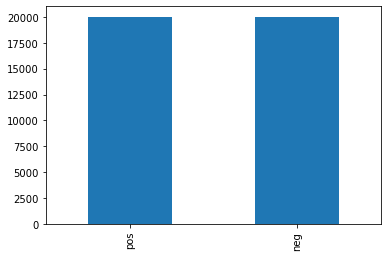

In [4]:
df['label'].value_counts().plot(kind='bar')

In [5]:
k = 'You do realize that you\'ve been watching the EXACT SAME SHOW for eight years, right? I could understand the initial curiosity of seeing strangers co-exist on an Island, but you\'d think that after watching unkempt, stink-ladened heroes run roughshod through the bush with an egg on a spoon for half a decade would be enough to get you to commit to something a little more original (and interesting).<br /><br />And I\'m not even speaking of the shows validity which for the record I find questionable. It\'s just hard to suspend disbelief for "Bushy Bill" eating a rat when the entire crew of producers and camera people are housed in an air conditioned make-shift bio-dome sipping frosty mochcinno\'s with moxy.<br /><br />What\'s the appeal here? I don\'t care about these people or their meandering lives. I just don\'t get it. But if you DO find yourself being captivated by hairy, unwashed people, I suggest you turn off your TV and just take a trip to your local bus station where you can see people like this in their TRUE habitat. They call them HOMELESS PEOPLE, and free of charge, you can sit back and marvel in their uncanny ability to retrieve various cigarette debris from a plethora of garbage canisters, eventually striking "pay-dirt" and fashioning a homemade Dr. Frankenstein-styled cancer-stick, all the while begging people for change for food when the stink of "Aqua Velva" on their breath is enough to suggest otherwise. And the best part? Much like Survivor, every week one member of the tribe "Leaves" the "Island" when they are unceremoniously sent packing to the local Institution when the frightening unmedicated state of full-blown schizophrenia kicks into gear! Now THAT\'S ENTERTAINMENT!'

In [6]:
df[df['review']==k]

,review,label
34527,You do realize that you've been watching the E...,neg
34645,You do realize that you've been watching the E...,neg
38487,You do realize that you've been watching the E...,neg


The corpus contain duplicate reviews so the duplicates ones need to be get rid off.

In [7]:
df = df.drop_duplicates()

In [8]:
x_train = df['review']
y_train = df['label']

In [9]:
x_train.to_csv('reviews.csv',index=False)
y_train.to_csv('label.csv',index=False)

# Text Cleaning

In [10]:
text = df['review'][10920]
tokenizer = RegexpTokenizer(r'\w+')
ss = SnowballStemmer(language='english')
en_stopwords = set(stopwords.words('english'))

In [11]:
text

'This movie is well made, it is beautiful and wise. It is heart-warming. It is great. And again it shows how great Peter Falk is... he is fantastic and he even gets better, the older he gets! Thank you, Peter Falk! Thank you very much for this gem of a movie! <br /><br />This movie entertains. There is lot of wisdom in this movie. There is lot of humor in this movie. There is life in this movie... and meaning. This movie shows, how life can be.<br /><br />Peter Falk is in that movie. He is just great! Where is the Oscar for Peter Falk? He deserves it so very much.<br /><br />Peter Falk just turned 80. I do sincerely hope that there will be more movies!<br /><br />Walter J. Langbein'

In [12]:
def cleantext(text):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    
    return cleantext
    

In [13]:
def cleaned_review(text):
    
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = cleantext(text)
    tokens = tokenizer.tokenize(text)
    new_token = [token for token in tokens if token not in en_stopwords]
    stem_token = [ss.stem(token) for token in new_token]
    clean_text = ' '.join(stem_token)
    
    return clean_text

In [14]:
cleaned_review(text)

'movi well made beauti wise heart warm great show great peter falk fantast even get better older get thank peter falk thank much gem movi movi entertain lot wisdom movi lot humor movi life movi mean movi show life peter falk movi great oscar peter falk deserv much peter falk turn 80 sincer hope movi walter j langbein'

# Classification

In [38]:
x_train = pd.read_csv('c:/Users/nishant/Movie Review classification/cleaned_review.csv')
y_train = pd.read_csv('c:/Users/nishant/Movie Review classification/label.csv')

In [39]:
x_train_new = x_train[:int(0.5*len(x_train))]
y_train_new = y_train[:int(0.5*len(y_train))]

In [40]:
le = LabelEncoder()
y_train_new = le.fit_transform(y_train_new['label'])

In [13]:
vect = CountVectorizer()
x_train_new = vect.fit_transform(x_train_new['review']).toarray()

In [6]:
mnb = MultinomialNB()

In [14]:
y_train_new = y_train_new.to_numpy().reshape((x_train_new.shape[0],))


In [15]:
mnb.fit(x_train_new,y_train_new)

MultinomialNB()

In [16]:
mnb.score(x_train_new,y_train_new)

0.9016112789526687

In [17]:
x_test = pd.read_csv('c:/Users/nishant/Movie Review classification/clean_test.csv')

In [27]:
x_test = vect.transform(x_test['review']).toarray()

In [29]:
y_pred = mnb.predict(x_test)

In [42]:
y_pred = le.inverse_transform(y_pred)

In [44]:
sub = pd.DataFrame(y_pred,columns=['column'])

In [46]:
sub.to_csv('submission.csv',index_label='Id')